### ЦЕЛЬ: изучить влияние различных факторов на успеваемость учащихся.
необходимо провести кластеризацию на датасете

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('StudentsPerformance.csv')

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:title={'center':'Test preparation course'}, ylabel='Count'>

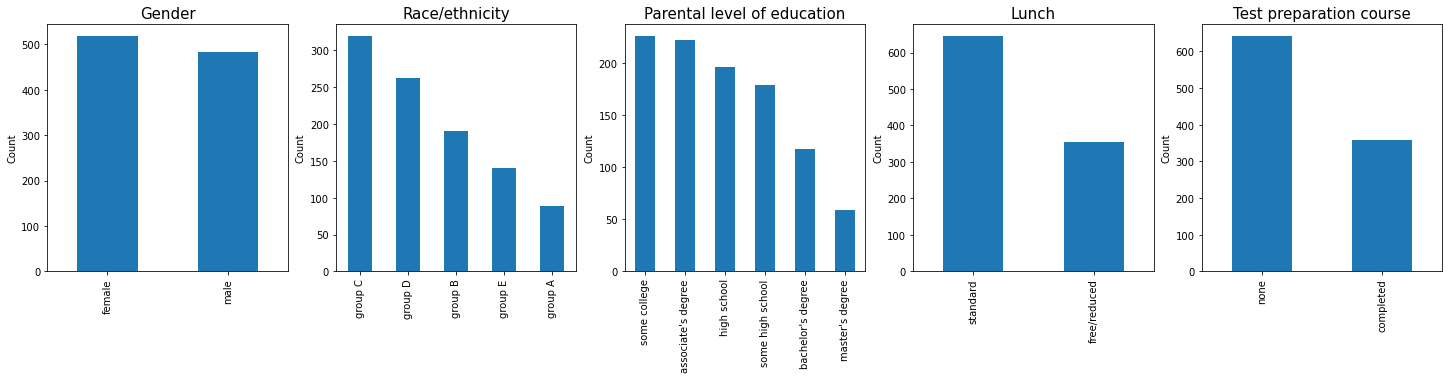

In [7]:
plt.figure(figsize=(25,10))
#plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, wspace=0.5, hspace=0.2)
plt.subplot(2,5,1)
plt.title("Gender",fontsize=15)
plt.ylabel("Count")
data['gender'].value_counts().plot.bar()

plt.subplot(2,5,2)
plt.title("Race/ethnicity",fontsize=15)
plt.ylabel("Count")
data['race/ethnicity'].value_counts().plot.bar()

plt.subplot(2,5,3)
plt.title("Parental level of education",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
data['parental level of education'].value_counts().plot.bar()

plt.subplot(2,5,4)
plt.title("Lunch",fontsize=15)
plt.ylabel("Count")
data['lunch'].value_counts().plot.bar()

plt.subplot(2,5,5)
plt.title("Test preparation course",fontsize=15)
plt.ylabel("Count")
data['test preparation course'].value_counts().plot.bar()

Из представленных выше графиков можно получить следующую информацию:

1) Женщин больше, чем мужчин.

2) Максимальное количество студентов относится к группе C (более 300), за которыми следуют группы D, B, E и A.

3) Меньше всего студентов, родители которых имеют степень магистра. Максимум родители закончили какой-нибудь колледж.

4) Более 300 человек имеют бесплатный/льготный обед, тогда как у большинства из них стандартный.

5) Большинство студентов не проходили/не заканчивали никаких подготовительных курсов.

In [8]:
print("Q1 : 25 percentile")
Q1 = data.quantile(0.25)
print(Q1)
print("Q2 : Median")
Q2 = data.quantile(0.5)
print(Q2)
print("Q3 : 75 percentile")
Q3 = data.quantile(0.75)
print(Q3)
print("IQR : difference between 75th and 25th percentile")
IQR = Q3 - Q1
print(IQR)

Q1 : 25 percentile
math score       57.00
reading score    59.00
writing score    57.75
Name: 0.25, dtype: float64
Q2 : Median
math score       66.0
reading score    70.0
writing score    69.0
Name: 0.5, dtype: float64
Q3 : 75 percentile
math score       77.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64
IQR : difference between 75th and 25th percentile
math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


<AxesSubplot:>

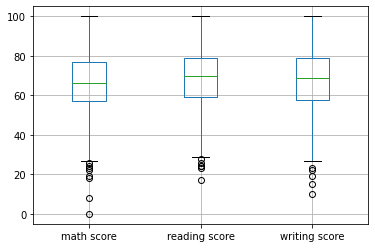

In [9]:
data.boxplot(column=['math score','reading score','writing score'])

В данных нет аномалий, так как нет баллов меньше 0 или больше 100 (общее количество баллов). Однако график показывает, что есть некоторые оценки, исключительно низкие по сравнению с другими оценками.

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Из 1000 записей математика имеет наименьшее среднее значение баллов и наименьшее минимальное количество баллов. Средние значения по двум предметам почти одинаковы. По каждому предмету есть ученик, набравший высшие баллы.

<AxesSubplot:xlabel='parental level of education'>

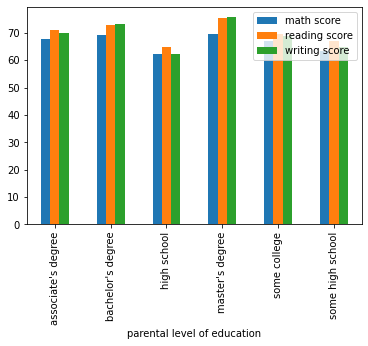

In [11]:
data.groupby('parental level of education').mean().plot.bar()

Среднее значение предметного балла больше в случае более высокой квалификации родителей.

In [9]:
avg_score = data [['math score', 'reading score', 'writing score']].mean(axis=1)

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <BarContainer object of 10 artists>)

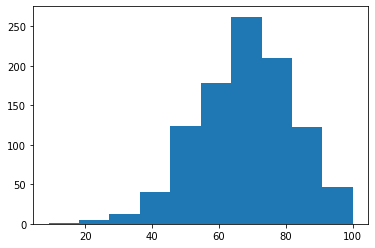

In [10]:
import matplotlib.pyplot as plt
plt.hist(avg_score)

In [11]:
avg_score.mean()

67.77066666666664

In [12]:
y = avg_score >= avg_score.mean()

In [13]:
y

0       True
1       True
2       True
3      False
4       True
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [14]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
# добавим столбцы категории для всех столбцов, кроме целевых столбцов (математика, баллы по чтению и письму)
dataset = pd.get_dummies(data, columns=['gender','race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'],
              prefix=['gender','race/ethnicity', 'parent_education', 'lunch', 'course'], drop_first=True)

In [16]:
dataset

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0


In [17]:
# Средняя оценка для целевого столбца, затем отбрасываем эти оценки
dataset['avg_score'] =  dataset[['math score', 'reading score', 'writing score']].apply(np.mean, axis=1)
dataset['avg_score'] = dataset['avg_score'].apply(lambda x : int(x))

In [18]:
dataset

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,course_none,avg_score
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1,72
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0,82
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1,92
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1,49
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0,94
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1,57
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0,65
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0,74


In [19]:
dataset.drop(['math score', 'reading score', 'writing score'], inplace=True, axis=1)

In [20]:
dataset

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,course_none,avg_score
0,0,1,0,0,0,1,0,0,0,0,1,1,72
1,0,0,1,0,0,0,0,0,1,0,1,0,82
2,0,1,0,0,0,0,0,1,0,0,1,1,92
3,1,0,0,0,0,0,0,0,0,0,0,1,49
4,1,0,1,0,0,0,0,0,1,0,1,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0,94
996,1,0,1,0,0,0,1,0,0,0,0,1,57
997,0,0,1,0,0,0,1,0,0,0,0,0,65
998,0,0,0,1,0,0,0,0,1,0,1,0,74


In [30]:
!pip install lightgbm 

In [31]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import lightgbm as lgb

In [32]:
#predictors
X = dataset.drop(['avg_score'], axis=1)
#response
y = dataset['avg_score']

In [33]:
# разделим данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state=1)

In [34]:
# критерии оценки модели
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    R_squared = r2_score(true,predicted)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("R-squared:", R_squared)

In [35]:
# Модели 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
 
RFReg = RandomForestRegressor(random_state = 0).fit(X_train, y_train)
LGBMReg = lgb.LGBMRegressor(random_state=0).fit(X_train, y_train)
LinearReg = LinearRegression(normalize = True).fit(X_train, y_train)

#### Метрики моделей

In [36]:
print("Random Forest Regressor") 
predicted_y_train = RFReg.predict(X_train)
evaluateRegressor(y_train,predicted_y_train,"    Training Set")
predicted_y_test = RFReg.predict(X_test)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")

Random Forest Regressor
    Training Set
MSE: 125.05611424413104
MAE: 8.883640197663077
RMSE: 11.182849111211823
R-squared: 0.38592183030252214
    Test Set
MSE: 186.1900830587758
MAE: 10.897475984439895
RMSE: 13.645148700500695
R-squared: 0.07821587974070887




In [37]:
print("LightGBM Regressor") 
predicted_train_y = LGBMReg.predict(X_train)
evaluateRegressor(y_train,predicted_y_train,"    Training Set")
predicted_y_test = LGBMReg.predict(X_test)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")

LightGBM Regressor
    Training Set
MSE: 125.05611424413104
MAE: 8.883640197663077
RMSE: 11.182849111211823
R-squared: 0.38592183030252214
    Test Set
MSE: 169.40372742047558
MAE: 10.323448995857255
RMSE: 13.015518714998477
R-squared: 0.1613212514673309




In [38]:
print("Linear Regression") 
predicted_train_y = LinearReg.predict(X_train)
evaluateRegressor(y_train,predicted_y_train,"    Training Set")
predicted_y_test = LinearReg.predict(X_test)
evaluateRegressor(y_test,predicted_y_test,"    Test Set")
print("\n")

Linear Regression
    Training Set
MSE: 125.05611424413104
MAE: 8.883640197663077
RMSE: 11.182849111211823
R-squared: 0.38592183030252214
    Test Set
MSE: 149.19587810492916
MAE: 9.820107601333588
RMSE: 12.214576460316959
R-squared: 0.26136564855685285




#### LGBM

In [39]:
# перед обучением модели сначало преобразуем ее в набор данных lgb
train_data=lgb.Dataset(X_train, label=y_train, free_raw_data=False)
valid_data=lgb.Dataset(X_test, label=y_test, free_raw_data=False)

In [40]:
# параметры для lgb
parameters = {
    'objective': 'regression',
    'metric': ' rmse', #mean squared error
    'is_unbalance': 'true',
    'boosting': 'gbdt', #дерево решений с градиентным бустингом
    'num_leaves': 87,
    'feature_fraction': 0.5, #данный параметр принимает значение с плавающей запятой от 0 до 1, которое информирует алгоритм о выборе этой доли показателей из общего числа для обучения на каждой итерации
    'bagging_fraction': 0.5, #этот параметр принимает значение с плавающей запятой от 0 до 1, которое позволяет указать, насколько большая часть данных будет случайно отбираться при обучении.
    'bagging_freq': 20,
    'learning_rate': 0.3, #этот параметр используется для определения скорости обучения.
    'verbose': -1
}

In [41]:
model_lgbm = lgb.train(parameters,
                           train_data,
                           valid_sets=valid_data,
                           num_boost_round=2500,
                           early_stopping_rounds=200)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Unknown parameter: rmse
[1]	valid_0's l2: 183.487
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l2: 179.008
[3]	valid_0's l2: 174.859
[4]	valid_0's l2: 173.529
[5]	valid_0's l2: 167.03
[6]	valid_0's l2: 163.05
[7]	valid_0's l2: 163.383
[8]	valid_0's l2: 161.36
[9]	valid_0's l2: 159.774
[10]	valid_0's l2: 158.57
[11]	valid_0's l2: 158.811
[12]	valid_0's l2: 158.102
[13]	valid_0's l2: 157.05
[14]	valid_0's l2: 157.099
[15]	valid_0's l2: 157.656
[16]	valid_0's l2: 157.018
[17]	valid_0's l2: 156.481
[18]	valid_0's l2: 156.704
[19]	valid_0's l2: 156.011
[20]	valid_0's l2: 154.358
[21]	valid_0's l2: 151.186
[22]	valid_0's l2: 150.577
[23]	valid_0's l2: 152.335
[24]	valid_0's l2: 150.965
[25]	valid_0's l2: 150.722
[26]	valid_0's l2: 152.514
[27]	valid_0's l2: 152.205
[28]	valid_0's l2: 152.588
[29]	valid_0's l2: 153.443
[30]	valid_0's l2: 154.199
[31]	valid_0's l2: 154.687
[32]	valid_0's l2: 154.941
[33]	valid_0's l2: 154.386
[34]	valid_0's l

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

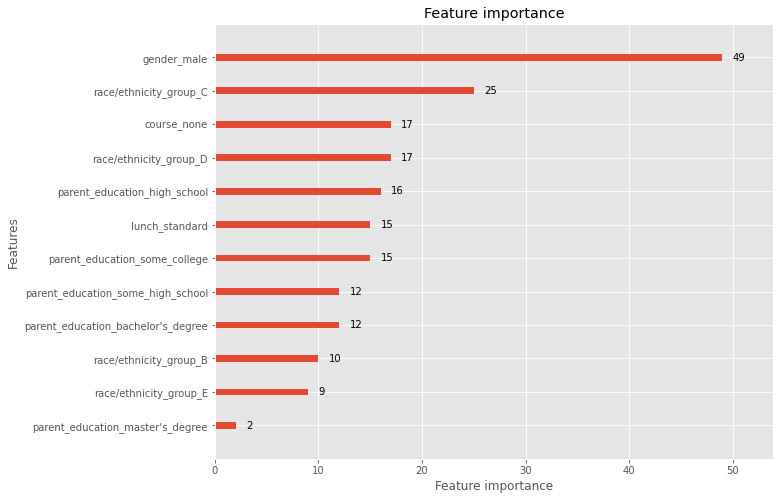

In [42]:
# график важности показателей, используя модель, ранее обученный для задачи регрессии.
lgb.plot_importance(model_lgbm, figsize=(10, 8))

Наибольшее влияние на среднюю успеваемость по предметам у студентов  оказывает их: пол, этническая группа С, курс подготовки к экзаменам, бюджет на обед. 

In [43]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


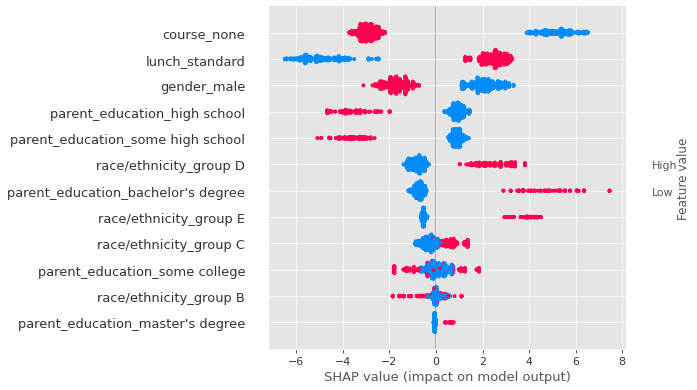

In [46]:
#Feature Importance c использованием Шепли
import shap
model_lgbm.params['objective'] = 'regression'
shap_values = shap.TreeExplainer(model_lgbm).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

По важности обеих характеристик мы видим, что курс подготовки к экзаменам, бюджет на обеды  и пол в значительной степени способствуют  достижением у студентов средней успеваемости.